In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
import pandas as pd
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
pd.set_option("max_rows", 100)
pd.set_option("max_colwidth", 2000)

In [54]:
train_set = pd.read_csv('./data/Corona_NLP_train_clean.csv')
test_set = pd.read_csv('./data/Corona_NLP_test_clean.csv')

In [9]:
nlp = English()

In [51]:
def featurize_text(text):
    text = nlp(text)
    filtered_text = list()
    for word in text:
        if (word.is_stop == False) and (word.is_punct == False):
            filtered_text.append(word.lemma)
    return filtered_text

In [37]:
X_train = make_bag_of_words(train_set)
X_test = make_bag_of_words(clean_df_test)

In [62]:
tfidf_vectorizer = TfidfVectorizer(tokenizer = featurize_text)
X_train = tfidf_vectorizer.fit_transform(train_set['OriginalTweet'])
X_test = tfidf_vectorizer.transform(test_set['OriginalTweet'])
y_train = train_set['SentimentCode'].values
y_test = test_set['SentimentCode'].values

In [91]:
from sklearn.linear_model import  LogisticRegression
lin_class = LogisticRegression(max_iter=400)
lin_class.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [92]:
from sklearn.metrics import f1_score, plot_confusion_matrix

In [93]:
predict_train = lin_class.predict(X_train)
predict_test = lin_class.predict(X_test)

In [94]:
predict_train

array([2, 3, 3, ..., 3, 3, 1], dtype=int64)

In [95]:
f1_score(predict_train, y_train, average=None)

array([0.77691922, 0.77818506, 0.83418302, 0.79860967, 0.80297337])

In [96]:
f1_score(predict_test, y_test, average=None)

array([0.51536174, 0.50211168, 0.60658307, 0.54089219, 0.5703125 ])

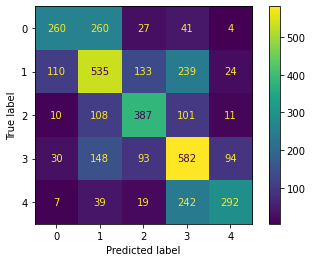

In [97]:
plot_confusion_matrix(lin_class, X_test, y_test)

In [ ]:
plot_confusion_matrix(lin_class, X_test, y_test)